In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genextreme
from scipy.stats import probplot
from iminuit import Minuit
import statsmodels.api as sm
from calendar import month_abbr

# 1) Winter Months NAO

In [163]:
# Read in data
df = pd.read_csv('nao.dat', delim_whitespace=True, header=0)
data = df[df['Year'] >= 1830]
data = data[['Year', 'Jan', 'Feb', 'Mar', 'Dec']]
data['Jan'].iloc[0] = np.nan
data['Feb'].iloc[0] = np.nan
data['Mar'].iloc[0] = np.nan
data['Dec'].iloc[-1] = np.nan

In [221]:
data

,Year,Jan,Feb,Mar,Dec
9,1830,NaN,NaN,NaN,-3.506806
10,1831,-3.634241,0.621204,1.359634,-0.016806
11,1832,-0.764241,0.051204,1.999634,2.943194
12,1833,-1.084241,1.741204,-3.010366,3.793194
13,1834,2.345759,1.881204,1.249634,-0.266806
...,...,...,...,...,...
196,2017,-0.554241,0.601204,0.929634,0.623194
197,2018,1.095759,-0.878796,-1.240366,1.553194
198,2019,-1.084241,1.121204,2.269634,0.363194
199,2020,2.385759,3.921204,0.239634,-1.156806


In [165]:
jan_avg = np.mean(data['Jan'])
feb_avg = np.mean(data['Feb'])
mar_avg = np.mean(data['Mar'])
dec_avg = np.mean(data['Dec'])

In [166]:
new_data = data

In [167]:
new_data['Jan'] = data['Jan'] - jan_avg
new_data['Feb'] = data['Feb'] - feb_avg
new_data['Mar'] = data['Mar'] - mar_avg
new_data['Dec'] = data['Dec'] - dec_avg

In [168]:
new_data = new_data[['Jan', 'Feb', 'Mar', 'Dec']]

In [169]:
new_data

,Jan,Feb,Mar,Dec
9,NaN,NaN,NaN,-3.506806
10,-3.634241,0.621204,1.359634,-0.016806
11,-0.764241,0.051204,1.999634,2.943194
12,-1.084241,1.741204,-3.010366,3.793194
13,2.345759,1.881204,1.249634,-0.266806
...,...,...,...,...
196,-0.554241,0.601204,0.929634,0.623194
197,1.095759,-0.878796,-1.240366,1.553194
198,-1.084241,1.121204,2.269634,0.363194
199,2.385759,3.921204,0.239634,-1.156806


In [170]:
data_array = new_data.to_numpy()
data_array = data_array.flatten()[3:-1]
x_data = np.array(list(range(len(data_array))))

In [171]:
x_months = ['Dec', 'Jan', 'Feb', 'Mar'] * int(len(data_array) / 4)

In [172]:
x_string_ticks = []
for year in data['Year']:
    if year == 1830:
        x_string_ticks += [str(year) + 'D']
    elif year == 2021:
        x_string_ticks += [str(year) + 'J',
                           str(year) + 'F',
                           str(year) + 'M']
    else:
        x_string_ticks += [str(year) + 'J',
                           str(year) + 'F',
                           str(year) + 'M',
                           str(year) + 'D']        

In [173]:
sep = 50

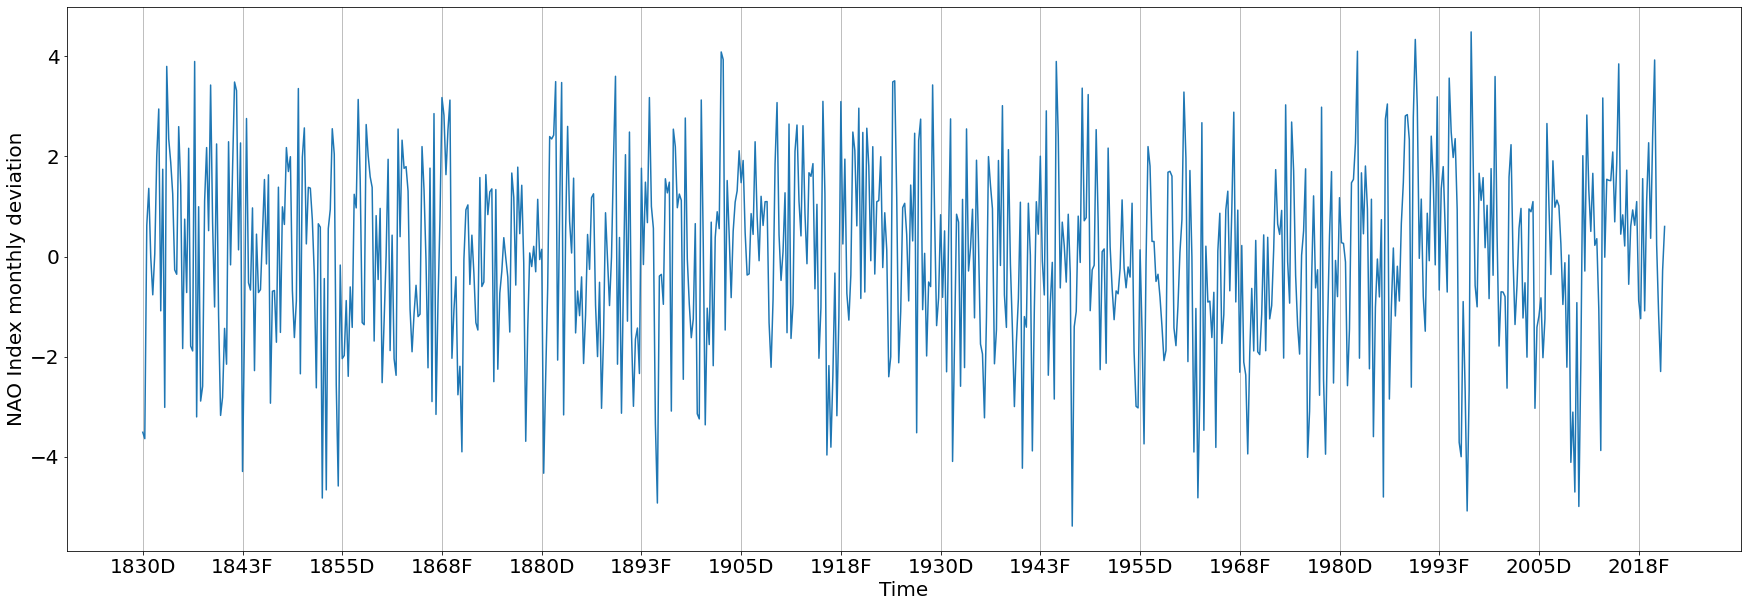

In [174]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(x_data, data_array)
ax.set_xlabel('Time', fontsize=20)
ax.set_xticks(list(range(len(x_string_ticks)))[::sep])
ax.set_xticklabels(x_string_ticks[::sep], fontsize=20)
ax.grid(axis='x')
ax.set_ylabel('NAO Index monthly deviation', fontsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig('timeseries1.png')
plt.show()

In [175]:
data_array[0:5]

array([-3.50680628, -3.63424084,  0.62120419,  1.35963351, -0.01680628])

In [176]:
above_zero1 = data_array >= 0
below_zero1 = data_array < 0

In [177]:
above_zero1[0:5]

array([False, False,  True,  True, False])

In [178]:
below_zero1[0:5]

array([ True,  True, False, False,  True])

# England/Wales Monthly PCP

In [179]:
df2 = pd.read_csv('HadEWP_monthly_qc.txt', delim_whitespace=True, header=3)

In [180]:
data2 = df2[df2['YEAR'] >= 1830]
data2 = data2[['YEAR', 'JAN', 'FEB', 'MAR', 'DEC']]
data2 = data2.iloc[:-1]
data2['JAN'].iloc[0] = np.nan
data2['FEB'].iloc[0] = np.nan
data2['MAR'].iloc[0] = np.nan
data2['DEC'].iloc[-1] = np.nan

In [181]:
new_data2 = data2[['JAN', 'FEB', 'MAR', 'DEC']]

In [222]:
new_data2

,JAN,FEB,MAR,DEC
64,NaN,NaN,NaN,73.2
65,62.1,89.4,78.7,112.7
66,38.0,28.8,66.1,88.8
67,27.9,158.6,52.6,129.2
68,149.8,51.6,43.3,36.2
...,...,...,...,...
251,79.6,72.0,80.6,113.4
252,104.5,52.8,115.1,116.0
253,47.1,54.2,94.7,121.4
254,82.5,169.5,57.9,159.2


In [183]:
data_array2 = new_data2.to_numpy()
data_array2 = data_array2.flatten()[3:-1]

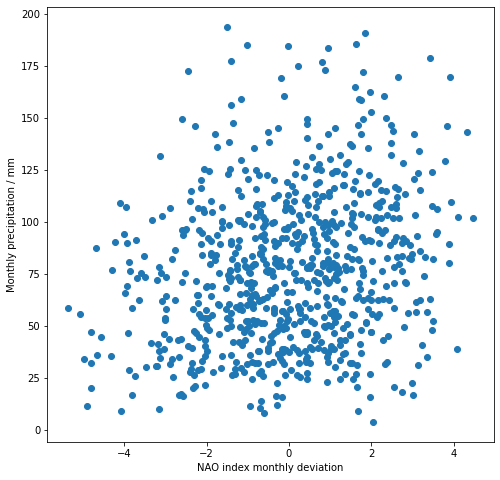

In [184]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(data_array, data_array2)
ax.set_xlabel('NAO index monthly deviation')
ax.set_ylabel('Monthly precipitation / mm')
plt.savefig('corr.png')
plt.show()

In [185]:
pearson_corr = np.corrcoef(data_array, data_array2)[0][1]

In [186]:
pearson_corr

0.22717707351890387

In [187]:
pcp_pos = data_array2[above_zero1]
pcp_neg = data_array2[below_zero1]

In [188]:
n_bins = 32

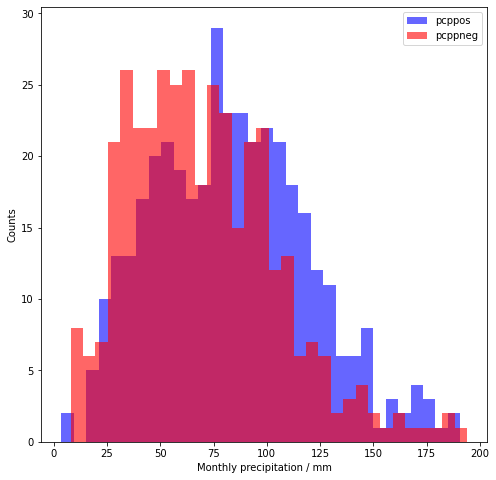

In [189]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(pcp_pos, bins=n_bins, color='b', label='pcppos', alpha=0.6)
ax.hist(pcp_neg, bins=n_bins, color='r', label='pcppneg', alpha=0.6)
ax.set_xlabel('Monthly precipitation / mm')
ax.set_ylabel('Counts')
ax.legend()
plt.savefig('twodists.png')
plt.show()

In [190]:
def calc_ratio(pcp_pos, pcp_neg, percent):
    vwet_threshold = np.percentile(data_array2, percent)

    count_naopos = pcp_pos[pcp_pos >= vwet_threshold].size
    count_naoneg = pcp_neg[pcp_neg >= vwet_threshold].size
    samples_inc = (count_naopos + count_naoneg) / data_array2.size
    ratio = count_naopos / count_naoneg
    
    return ratio, samples_inc

In [191]:
percent = 85
ratio, samples_inc = calc_ratio(pcp_pos, pcp_neg, percent)

#print('count_naopos:', count_naopos)
#print('count_naoneg:', count_naoneg)
print('Samples included:', 100*samples_inc, '%')
print('count_naopos/count_naoneg:', ratio)

Samples included: 15.052356020942408 %
count_naopos/count_naoneg: 2.108108108108108


In [192]:
percents = list(range(50, 101))
ratios = []
samples_inc = []
for percent in percents:
    ratios.append(calc_ratio(pcp_pos, pcp_neg, percent)[0])
    samples_inc.append(calc_ratio(pcp_pos, pcp_neg, percent)[1])

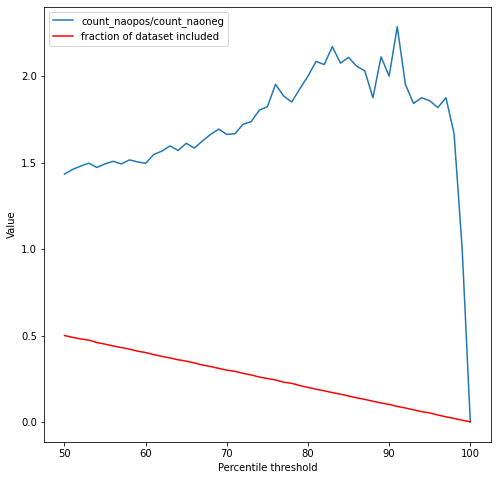

In [193]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(percents, ratios, label='count_naopos/count_naoneg')
ax.plot(percents, samples_inc, color='r', label='fraction of dataset included')
ax.set_xlabel('Percentile threshold')
ax.set_ylabel('Value')
ax.legend()
plt.savefig('ratiopercent.png')
plt.show()

# Scotland Daily PCP

In [194]:
df3 = pd.read_csv('HadSP_daily_qc.txt', delim_whitespace=True, header=None,
                  names=['Year', 'Month']+list(range(1, 32)), skiprows=3)

In [195]:
df3 = df3.replace(-99.99, np.nan)
df3 = df3.iloc[0:-11]
df3['Monthly max'] = df3.iloc[:, 1:].max(axis=1)
df3 = df3.iloc[:-1]

In [223]:
 df3.tail(20)

,Year,Month,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,Monthly max
1072,2020,5,1.00,0.16,1.66,0.08,0.03,0.23,0.44,1.63,...,4.84,0.10,0.35,0.00,1.53,0.01,0.00,0.00,0.00,9.05
1073,2020,6,0.16,8.04,1.18,3.24,12.66,2.31,0.26,0.03,...,3.74,1.08,2.59,3.25,11.19,13.88,2.76,3.42,NaN,13.88
1074,2020,7,1.53,9.08,9.06,16.55,8.41,1.30,1.73,1.17,...,1.54,13.44,4.11,8.07,22.13,0.96,2.90,4.17,3.44,22.13
1075,2020,8,2.92,2.31,6.00,20.94,4.33,0.11,3.76,0.01,...,2.59,5.41,21.00,2.48,10.58,1.10,0.24,0.02,0.02,21.00
1076,2020,9,1.71,14.35,1.88,3.61,2.58,7.23,1.80,8.90,...,0.31,1.95,0.48,0.02,0.50,0.95,5.94,16.83,NaN,16.83
1077,2020,10,6.02,5.18,52.81,5.09,4.13,2.41,3.67,5.51,...,9.10,3.86,5.54,2.26,10.78,2.48,12.14,8.52,11.80,52.81
1078,2020,11,7.85,5.53,2.29,0.76,0.06,0.12,0.16,4.97,...,11.01,8.30,0.97,0.34,1.66,0.09,4.83,1.23,NaN,11.34
1079,2020,12,1.67,5.18,13.41,21.72,4.31,1.12,17.48,3.22,...,2.30,0.55,3.53,18.29,5.40,3.36,2.67,4.82,3.33,21.72
1080,2021,1,1.32,3.63,2.48,1.25,0.31,3.75,3.07,0.30,...,1.07,2.53,2.01,5.04,7.11,16.37,1.89,0.31,0.26,16.37
1081,2021,2,0.97,9.88,10.64,24.27,5.71,1.38,0.80,0.84,...,10.25,2.11,0.59,0.15,0.06,0.09,NaN,NaN,NaN,24.27


In [197]:
monthly_maxs = np.reshape(np.array(df3['Monthly max']), (91, 12))
yearly_maxs = np.max(monthly_maxs, axis=1)

In [198]:
def calc_pdf(yearly_maxs, shape, loc, scale):
    return genextreme.pdf(yearly_maxs, shape, loc, scale)

def calc_nll(shape, loc, scale):
    pdf = calc_pdf(yearly_maxs, shape, loc, scale)
    pdf[pdf <= 0] = 1e-9
    nll = -1 * np.sum(np.log(pdf))
    return nll

def calc_new_nll(shape, loc, scale):
    pdf = calc_pdf(resamples, shape, loc, scale)
    pdf[pdf <= 0] = 1e-9
    nll = -1 * np.sum(np.log(pdf))
    return nll

In [199]:
# fit with minutuit given reasonable initial guesses
fit1 = Minuit(calc_nll, shape=0.5, loc=20.0, scale=6.0)
# definition of error for nll given in notes
fit1.errordef = 0.5
fit1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 280.6                      │              Nfcn = 131              │
│ EDM = 3.98e-07 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ shape │   -0.05   │   0.08    │            │            │         │         │       │
│ 1 │ loc   │   26.2    │    0.5    │            │            │         │         │       │
│ 2 │ scale │    4.4    │    0.4    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │   shape     loc   scale │
├───────┼─────────────────────────┤
│ shape │ 0.00625  0.0142 0.00728 │
│   loc │  0.0142   0.269  0.0857 │
│ scale │ 0.00728  0.0857   0.147 │
└───────┴─────────────────────────┘

# IS TAIL SHAPE WHAT WE EXPECT???

In [202]:
# parameter best estimates and errors for (i)
c_fit1 = fit1.values["shape"]
loc_fit1 = fit1.values["loc"]
scale_fit1 = fit1.values["scale"]
c_error_fit1 = fit1.errors["shape"]
loc_error_fit1 = fit1.errors["loc"]
scale_error_fit1 = fit1.errors["scale"]

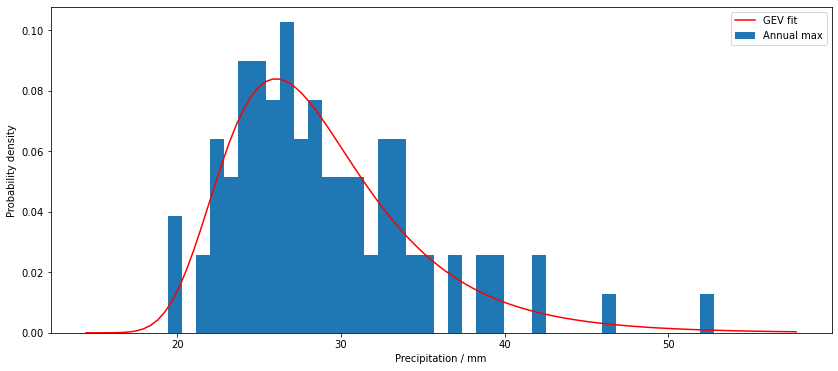

In [203]:
minimum, maximum, step = yearly_maxs.min(), yearly_maxs.max(), 100
extra = 5.
x = np.linspace(minimum-extra, maximum+extra, step)
y = genextreme.pdf(x, c_fit1, loc_fit1, scale_fit1)

fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(yearly_maxs, density=True, bins=39, label='Annual max')
ax.plot(x, y, color='r', label='GEV fit')
ax.set_xlabel('Precipitation / mm')
ax.set_ylabel('Probability density')
ax.legend()
plt.savefig('minuitfif.png')
plt.show()

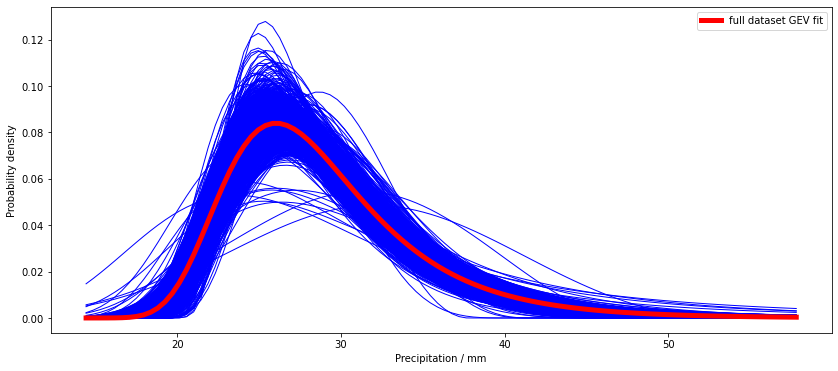

In [157]:
fig, ax = plt.subplots(figsize=(14, 6))
count = 0
num_resamples = 1000
cs = []
locs = []
scales = []
while (count < num_resamples):
    resamples = np.random.choice(yearly_maxs, size=yearly_maxs.size)
    new_fit = Minuit(calc_new_nll, c=0.5, loc=20.0, scale=6.0)
    new_fit.errordef = 0.5
    new_fit.migrad()
    new_c, new_loc, new_scale  = new_fit.values["c"], new_fit.values["loc"], new_fit.values["scale"]
    cs.append(new_c)
    locs.append(new_loc)
    scales.append(new_scale)
    new_y = genextreme.pdf(x, new_c, new_loc, new_scale)
    ax.plot(x, new_y, 'b-', linewidth=1)
    count += 1
#then plot full data GEV:
ax.plot(x, y, 'r-', linewidth=5, label='full dataset GEV fit')
ax.set_xlabel('Precipitation / mm')
ax.set_ylabel('Probability density')
ax.legend()
plt.savefig('bootstrap.png')
plt.show()

In [204]:
cs = np.array(cs)
locs = np.array(locs)
scales = np.array(scales)

boot_c_error = np.std(cs, ddof=1)
boot_loc_error = np.std(locs, ddof=1)
boot_scale_error = np.std(scales, ddof=1)

print('Bootstrap error on shape:', boot_c_error)
print('Bootstrap error on loc:', boot_loc_error)
print('Bootstrap error on scale:', boot_scale_error)

Bootstrap error on shape: 0.08678307217657746
Bootstrap error on loc: 0.5400799199070195
Bootstrap error on scale: 0.46412707285030846


In [205]:
myGEV = genextreme(c=c_fit1, loc=loc_fit1, scale=scale_fit1)

In [206]:
yearly_maxs

array([37.31, 27.51, 28.38, 27.4 , 24.66, 26.92, 22.71, 29.86, 26.86,
       23.6 , 22.  , 32.35, 25.66, 28.23, 24.34, 22.36, 23.94, 27.6 ,
       36.65, 33.97, 24.25, 19.42, 25.03, 30.4 , 25.7 , 39.29, 26.33,
       38.65, 30.95, 25.94, 39.5 , 35.06, 21.93, 26.4 , 32.93, 33.94,
       22.44, 23.87, 21.65, 32.64, 24.58, 23.15, 31.52, 20.08, 27.92,
       24.37, 30.68, 28.93, 25.  , 29.06, 41.89, 25.  , 19.66, 29.49,
       30.31, 24.63, 26.91, 28.49, 32.88, 26.28, 28.29, 34.51, 25.16,
       33.78, 27.65, 25.44, 23.84, 32.03, 28.12, 24.45, 22.88, 34.87,
       25.9 , 38.33, 31.23, 33.57, 27.05, 22.74, 42.22, 28.14, 32.76,
       33.46, 30.34, 46.6 , 26.13, 22.93, 34.44, 30.67, 26.47, 52.81,
       29.38])

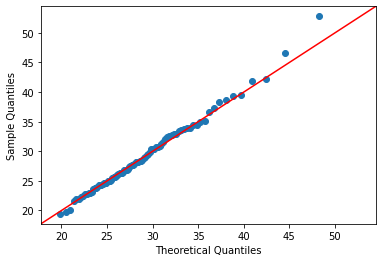

In [207]:
mypplot = sm.ProbPlot(yearly_maxs, dist=myGEV)
fig = mypplot.qqplot(line='45')
plt.savefig('QQplot')
plt.show()

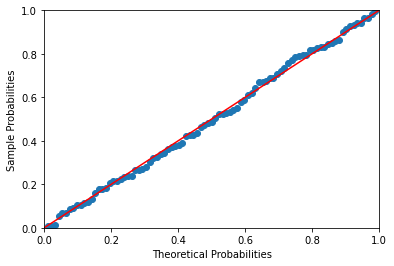

In [208]:
fig = mypplot.ppplot(line='45')
plt.savefig('PPplot')
plt.show()

In [209]:
yearly_max_idxs = np.argmax(monthly_maxs, axis=1)
yearly_max_idxs += 1
yearly_max_months = []
for idx in yearly_max_idxs:
    month_name = month_abbr[idx]
    yearly_max_months.append(month_name)

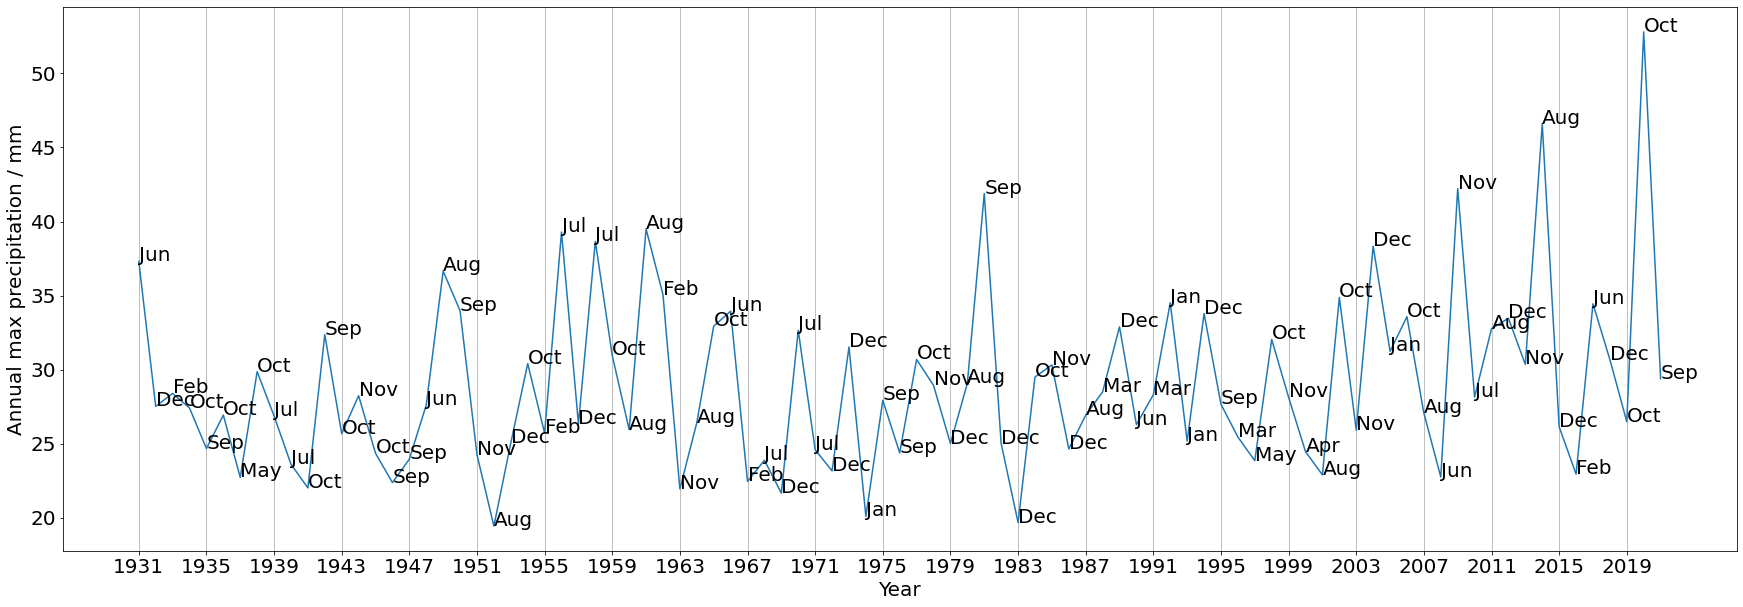

In [215]:
year_nums = list(range(1931,2022))
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(year_nums, yearly_maxs)
for i, txt in enumerate(yearly_max_months):
    ax.annotate(txt, (year_nums[i], yearly_maxs[i]), fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_xticks(year_nums[::4])
ax.tick_params(axis='x', labelsize=20)
ax.grid(axis='x')
ax.set_ylabel('Annual max precipitation / mm', fontsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig('maxmonthseries')
plt.show()

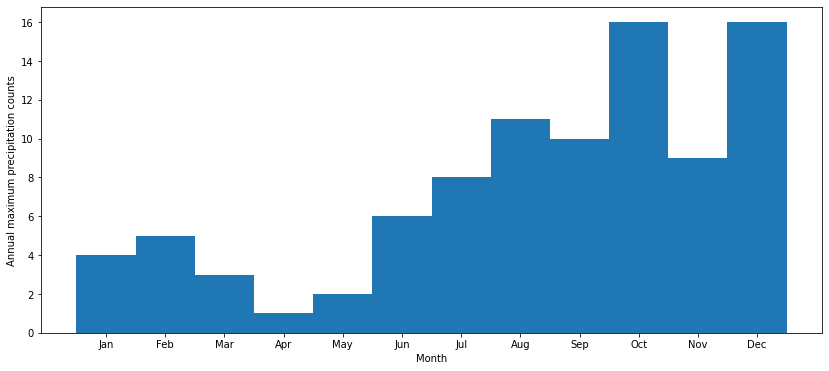

In [216]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(yearly_max_idxs, bins=np.arange(0.5, 13.5))
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_abbr[x] for x in range(1, 13))
ax.set_ylabel('Annual maximum precipitation counts')
plt.savefig('monthhist')
plt.show()

In [217]:
def calc_return_period(x, dist):
    return 1. / (1. - dist.cdf(x))

In [218]:
ex_idx1 = year_nums.index(1981)
ex_pcp1 = yearly_maxs[ex_idx1]
ex_idx2 = year_nums.index(2020)
ex_pcp2 = yearly_maxs[ex_idx2]
ex_idx3 = year_nums.index(2004)
ex_pcp3 = yearly_maxs[ex_idx3]

return_period1 = calc_return_period(ex_pcp1, myGEV)
return_period2 = calc_return_period(ex_pcp2, myGEV)
return_period3 = calc_return_period(ex_pcp3, myGEV)

print('Return period of 1981 precipitation:', return_period1, 'years')
print('Return period of 2020 precipitation:', return_period2, 'years')
print('Return period of 2004 precipitation:', return_period3, 'years')

Return period of 1981 precipitation: 27.857765937529937 years
Return period of 2020 precipitation: 210.99051804798367 years
Return period of 2004 precipitation: 13.971033524456638 years
